In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [160]:
build_data=pd.read_csv(r'https://raw.githubusercontent.com/Josepholaidepetro/Indaba_Water/main/data/Train.csv')
test_data=pd.read_csv(r'https://raw.githubusercontent.com/Josepholaidepetro/Indaba_Water/main/data/Test.csv')
ss = pd.read_csv(r'https://raw.githubusercontent.com/Josepholaidepetro/Indaba_Water/main/data/SampleSubmission.csv')

In [161]:
build_data.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,NaN,261.753637,21174.713291,7.314074,NaN,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


In [162]:
build_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1924.000000,2260.000000,2260.000000,2260.000000,1713.000000,2260.000000,2260.000000,2149.000000,2260.000000,2260.000000
mean,7.083561,247.000935,22100.926521,6.802715,334.601013,436.572437,14.359075,66.440129,3.969176,0.388496
std,1.596243,33.162065,8829.474740,1.592352,42.216115,80.645313,3.298100,16.321315,0.777228,0.487516
min,0.000000,124.266124,321.247422,0.047189,129.745113,211.724737,4.476899,0.853000,1.450000,0.000000
25%,6.114364,226.799112,15761.393491,5.800652,307.637713,376.894507,12.154291,55.918503,3.444178,0.000000
50%,7.060886,247.379235,21149.453853,6.828266,333.943304,432.813965,14.325645,66.727984,3.962502,0.000000
75%,8.045673,267.798367,27347.271380,7.802569,361.159118,492.076858,16.625857,77.488813,4.502519,1.000000
max,13.541240,373.897891,61227.500818,12.822189,481.775755,718.331364,28.405000,124.115000,6.739000,1.000000


In [163]:
build_data['Potability'].value_counts()

0    1382
1     878
Name: Potability, dtype: int64

In [164]:
build_data.groupby('Potability').median()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.078659,247.444825,21032.975504,6.780508,334.244316,432.813965,14.434839,66.816621,3.972916
1,7.040395,247.357106,21370.885301,6.959241,332.841184,433.073967,14.257659,66.536231,3.958576


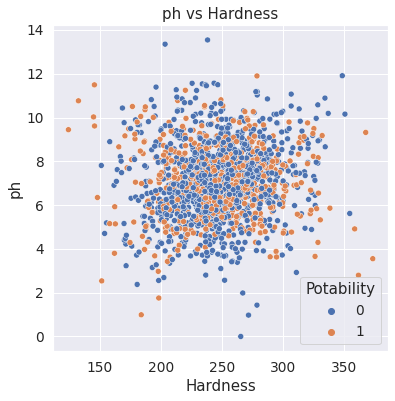

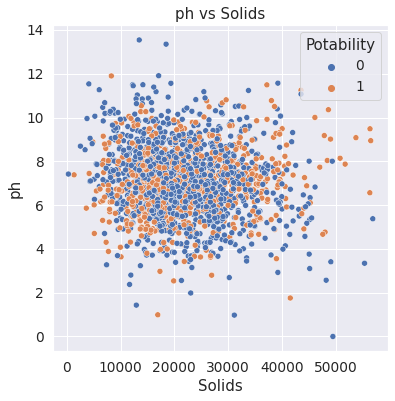

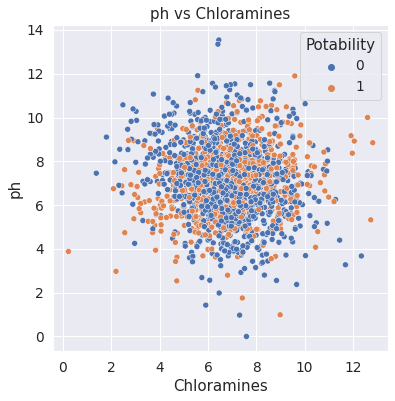

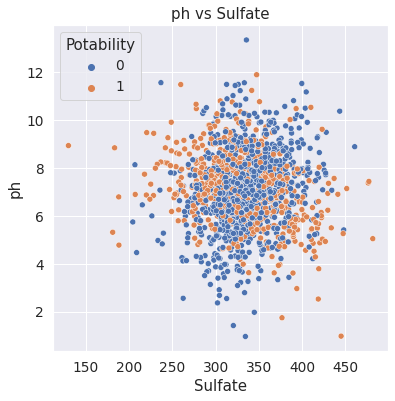

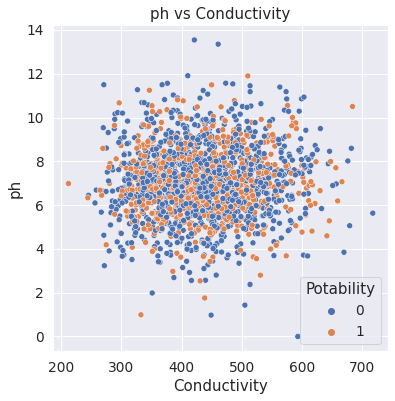

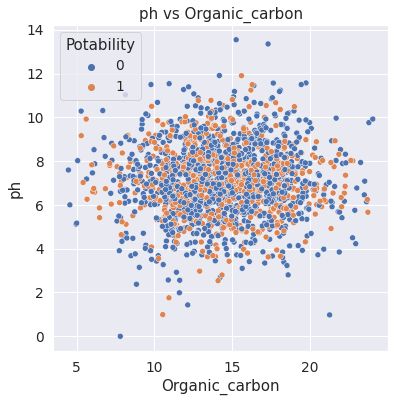

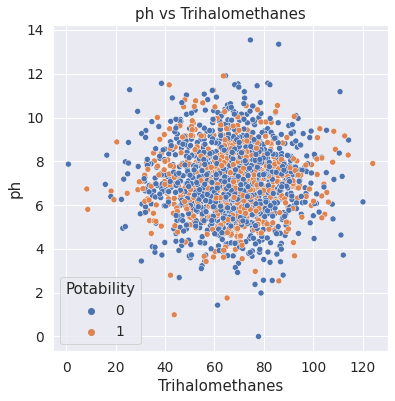

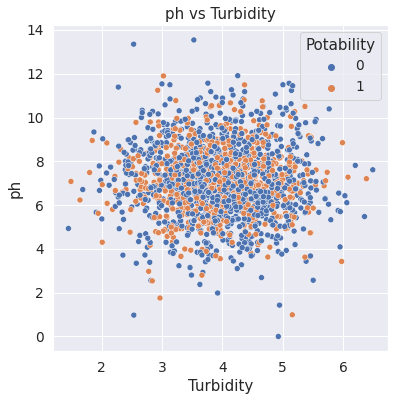

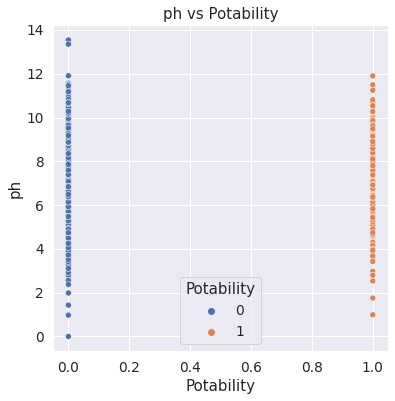

In [165]:
for i in build_data:
  if i != ('ph') and i != ('region_area_'):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=i, y='ph', hue='Potability', data=build_data)
    plt.title(f'ph vs {i}')
    plt.show()

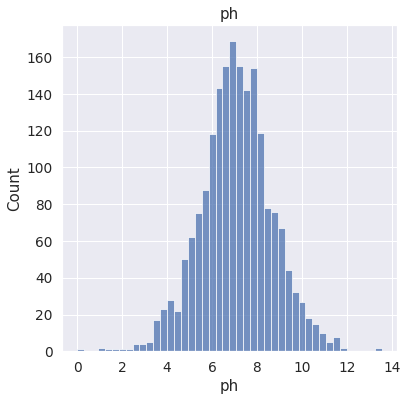

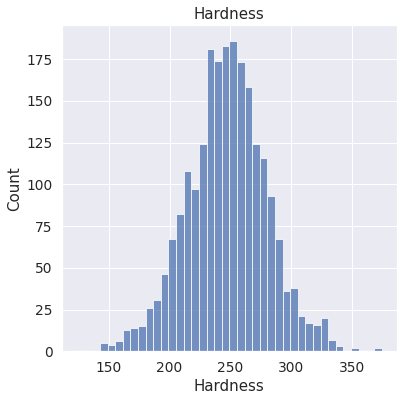

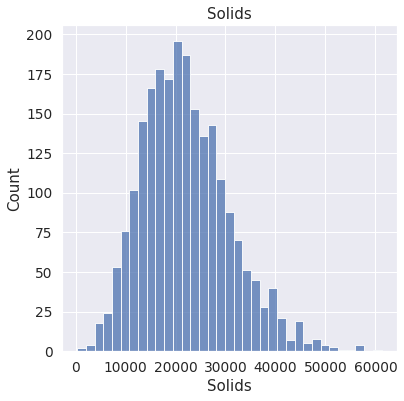

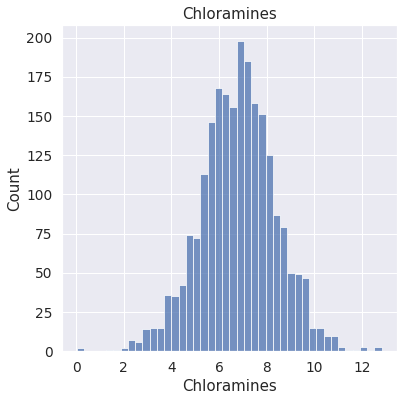

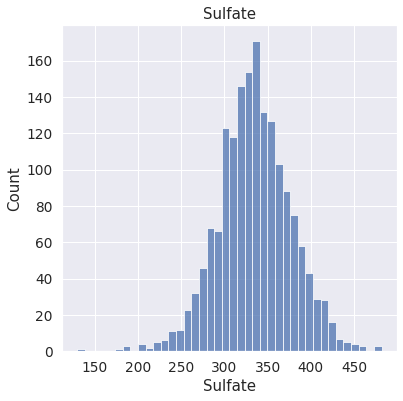

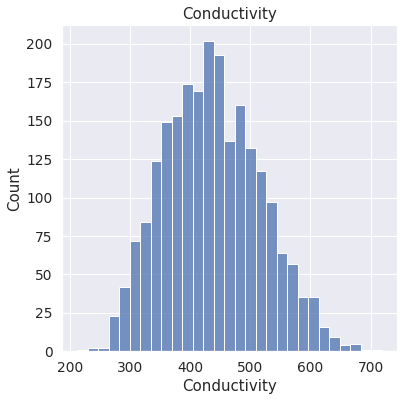

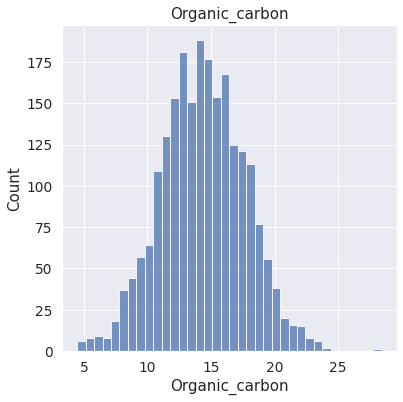

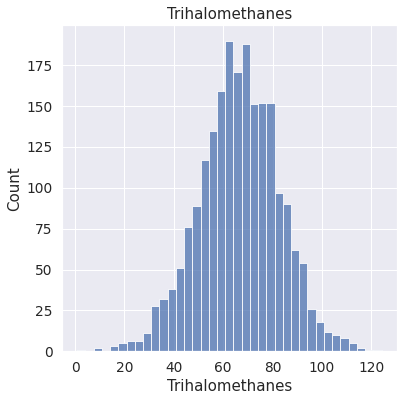

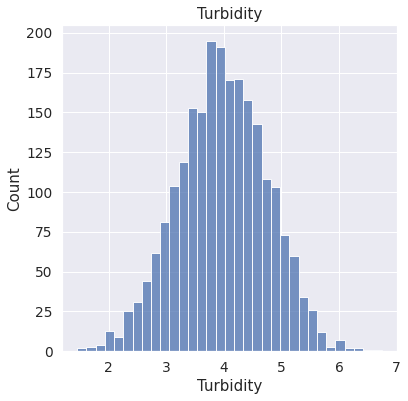

In [166]:
for i in build_data:
  if i != ('Potability') and i != ('region_area_'):
    plt.figure(figsize=(6,6))
    sns.histplot(data=build_data, x=i)
    plt.title(f'{i}')
    plt.show()

all columns shape display gaussian distibution

In [167]:
build_data.isna().sum()

region_area_         0
ph                 336
Hardness             0
Solids               0
Chloramines          0
Sulfate            547
Conductivity         0
Organic_carbon       0
Trihalomethanes    111
Turbidity            0
Potability           0
dtype: int64

In [168]:
build_data[build_data['ph']<7][:10]

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
5,region_area_1003,4.581969,236.871806,33897.373012,6.053592,317.297905,416.487378,19.804848,62.438303,4.500208,0
7,region_area_1005,6.168839,289.074938,24827.821451,7.415200,270.235286,492.778327,22.196990,79.284281,4.435760,0
12,region_area_1014,5.487876,229.980874,20162.323428,4.906620,306.009255,520.714385,12.693475,58.976558,4.223576,0
16,region_area_1018,6.013161,269.617147,21574.052382,8.991041,321.913426,454.381635,14.849347,62.558239,3.455623,0
18,region_area_1020,5.218990,215.564882,27008.191716,6.287706,NaN,432.328802,14.175879,74.035320,4.383943,0
22,region_area_1024,6.729580,292.938037,17975.858038,9.503841,322.980215,450.964435,13.676223,62.294477,4.003458,0
24,region_area_1028,6.209697,220.092395,22611.073524,4.570603,328.125052,559.381728,17.120118,51.620508,3.893767,0


In [169]:
build_data[build_data['ph']>7][:10]

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0
6,region_area_1004,7.884842,280.016551,21734.132854,7.598271,315.935097,378.875894,11.740399,49.919322,4.631641,0
9,region_area_1008,8.693104,235.546700,13284.082864,6.217004,349.299905,571.070910,14.083348,71.848845,2.898223,0
11,region_area_101,7.348845,274.038830,11519.351338,8.584748,NaN,504.263434,18.250374,73.830522,4.880875,0
14,region_area_1016,8.315959,272.044113,16123.609261,9.170991,348.922444,511.778983,22.264747,75.479974,2.760213,0
15,region_area_1017,8.551078,267.189823,28909.595095,6.631972,295.968820,521.000001,16.307371,79.974323,4.046380,0
17,region_area_102,8.526170,226.386727,11837.428170,7.178898,309.143629,484.345482,21.950916,52.487201,5.083014,0
20,region_area_1022,7.458708,258.560464,10513.601592,8.615822,NaN,452.473143,18.830302,44.013088,2.938082,0
21,region_area_1023,11.027880,279.096688,13124.410447,7.211833,320.099153,386.336918,8.138859,48.644038,4.178898,0
23,region_area_1026,7.159398,222.589996,28955.105823,5.512280,358.073872,540.631411,18.222042,79.209440,3.254926,0


In [170]:
null_data = build_data[build_data[['ph', 'Solids']].isnull().any(axis=1)]

In [171]:
null_data.shape

(336, 11)

In [172]:
lis3=[]
for i in build_data:
    lis3.append(build_data[str(i)].nunique())

cardinal=pd.DataFrame(lis3,build_data.columns).reset_index()
cardinal=cardinal.rename(columns={'index':'Features',0:'cardinality'})

In [173]:
cardinal

,Features,cardinality
0,region_area_,2260
1,ph,1924
2,Hardness,2260
3,Solids,2260
4,Chloramines,2260
5,Sulfate,1713
6,Conductivity,2260
7,Organic_carbon,2260
8,Trihalomethanes,2149
9,Turbidity,2260


In [174]:
# join train and test together
ntrain = build_data.shape[0]
ntest = test_data.shape[0]

all_data = pd.concat((build_data, test_data)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (3276, 11)


In [175]:
all_data['Sulph'] = all_data['Sulfate']/all_data['ph']
all_data['ocph'] = all_data['Organic_carbon']/all_data['ph']

In [176]:
for col in all_data:
  if col != 'Potability':
    all_data[col].fillna(-99, inplace = True)

In [177]:
def ph(x):
    if 0 < x <= 3:
        return 1
    elif x == -99:
      return -99
    elif 3 < x <= 5:
        return 2
    elif 5 < x <= 7.5:
        return 3
    elif 7.5 < x <= 9:
        return 4
    elif 9 < x <= 12:
        return 5
    else:
        return 6

In [178]:
all_data['ph_range'] = all_data['ph'].apply(ph)
all_data['H30+'] = np.where(all_data['ph'] == -99, -99, np.power(10,-1*all_data['ph']) )

In [179]:
chl_ph = []
for a,b in zip(all_data['ph'], all_data['Chloramines']):
  if (a <7.5) and (b >6.77):
    chl_ph.append(1)
  elif (a < 7.5) and (b < 6.77):
    chl_ph.append(2)
  elif (a > 7.5) and (b > 6.77):
    chl_ph.append(3)
  elif (a > 7.5) and (b < 6.77):
    chl_ph.append(4)
  else:
    chl_ph.append(5)

In [180]:
all_data['chl_ph'] = chl_ph

In [181]:
hard_ph = []
for a,b in zip(all_data['ph'], all_data['Hardness']):
  if (a > 7) and (b >250):
    hard_ph.append(1)
  elif (a < 7) and (b < 250):
    hard_ph.append(2)
  elif (a < 7) and (b > 250):
    hard_ph.append(3)
  elif (a > 7) and (b < 250):
    hard_ph.append(4)
  else:
    hard_ph.append(5)

In [182]:
#all_data['hard_ph'] = hard_ph

In [183]:
sol_ha = []
for a,b in zip(all_data['Solids'], all_data['Hardness']):
  if (a > 25555) and (b >250):
    sol_ha.append(1)
  elif (a < 25555) and (b < 250):
    sol_ha.append(2)
  elif (a < 25555) and (b > 25555):
    sol_ha.append(3)
  elif (a > 25555) and (b < 25555):
    sol_ha.append(4)
  else:
    sol_ha.append(5)

In [185]:
all_data.columns

Index(['region_area_', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability', 'Sulph', 'ocph', 'ph_range', 'H30+', 'chl_ph'],
      dtype='object')

In [186]:
all_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Sulph,ocph,ph_range,H30+,chl_ph
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,2260.000000,3276.000000,3276.000000,3276.000000,3.276000e+03,3276.000000
mean,-8.818372,247.143387,22014.397337,6.817466,231.169298,436.310111,14.389970,58.326669,3.966786,0.388496,-2.282459,inf,-11.948718,-1.483732e+01,2.131258
std,37.900017,32.879761,8768.570828,1.583085,188.255758,80.824064,3.308162,39.201301,0.780382,0.487516,76.140000,NaN,36.564745,3.534387e+01,1.060543
min,-99.000000,98.205891,321.247422,0.047189,-99.000000,191.588754,2.305000,-99.000000,1.450000,0.000000,-99.000000,-99.000000,-99.000000,-9.900000e+01,1.000000
25%,5.283146,227.624429,15666.995108,5.822610,241.467961,375.839414,12.170801,53.908688,3.439711,0.000000,-99.000000,1.388723,3.000000,1.189836e-09,1.000000
50%,6.735249,247.741518,20928.138417,6.825488,319.405495,431.989968,14.323338,65.560962,3.955028,0.000000,39.602377,1.894711,3.000000,4.118001e-08,2.000000
75%,7.870050,267.441347,27333.066938,7.810076,351.130869,491.897304,16.662652,76.781609,4.500320,1.000000,50.679302,2.410879,4.000000,5.276274e-07,3.000000
max,14.000000,373.897891,61227.500818,12.822189,481.775755,763.447620,28.405000,124.115000,6.739000,1.000000,1250.286079,inf,6.000000,1.000000e+00,4.000000


In [187]:
all_data['T/C'] = all_data['Trihalomethanes']/all_data['Chloramines']
all_data['Solids_tu'] = all_data['Solids']/all_data['Turbidity']
all_data['Solids_ha'] = all_data['Solids']/all_data['Hardness']
all_data['Solids_co'] = all_data['Solids']/all_data['Conductivity']

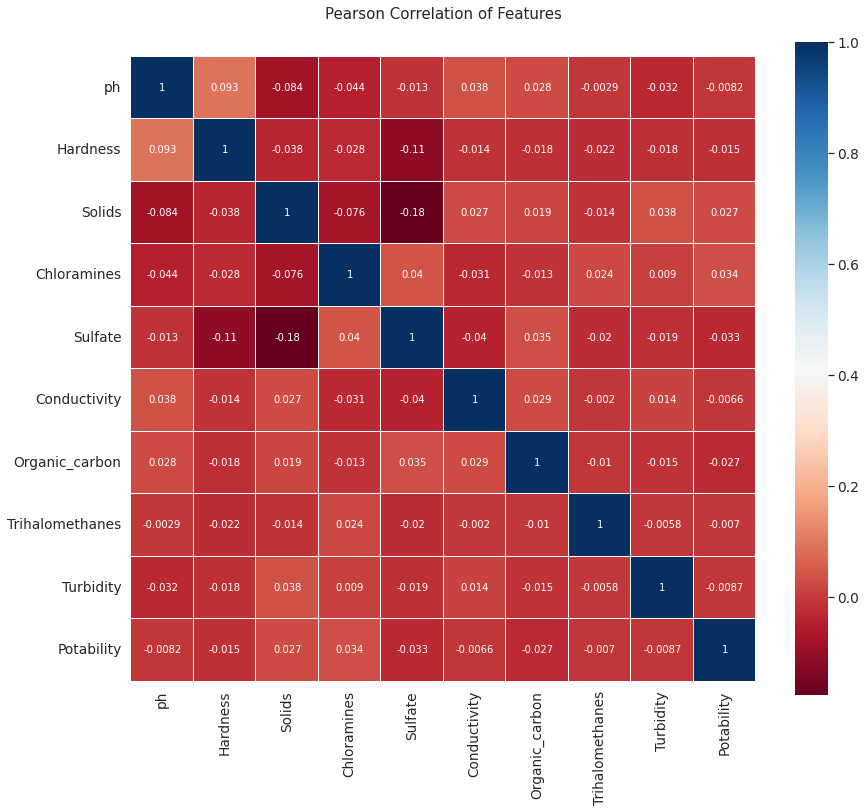

In [188]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(build_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

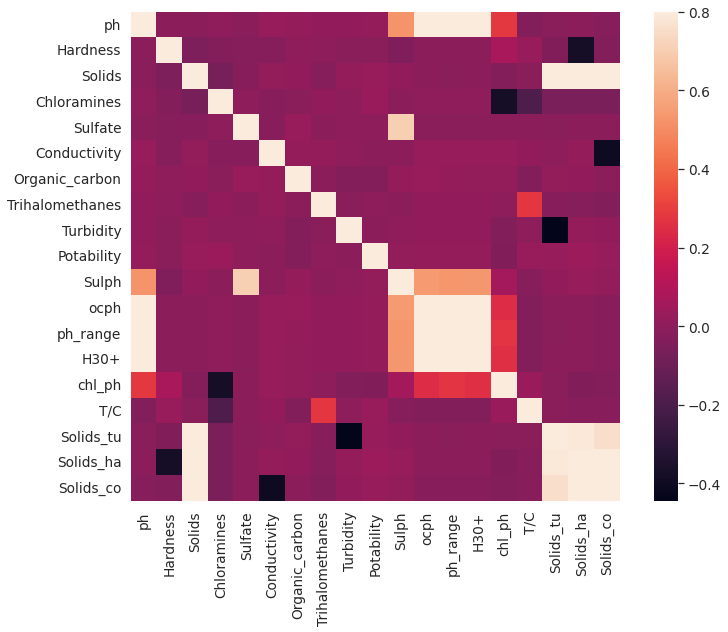

In [189]:
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True);

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


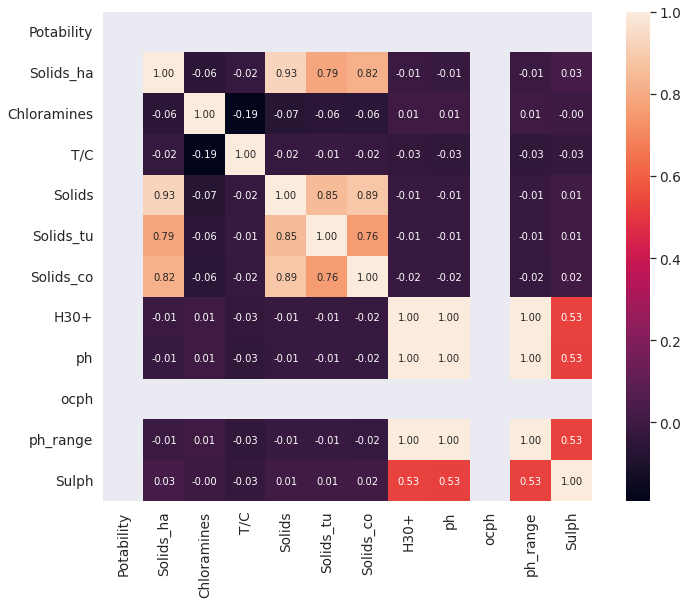

In [464]:
# Top 10 Heatmap
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Potability')['Potability'].index
cm = np.corrcoef(all_data[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [191]:
all_data.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Sulph,ocph,ph_range,H30+,chl_ph,T/C,Solids_tu,Solids_ha,Solids_co
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,-99.000000,602.990359,15.285013,56.444076,4.500656,0.0,-99.000000,4.113209,2,1.922737e-04,2,8.916303,4139.476896,103.388970,30.896618
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0.0,69.766250,3.180620,2,5.361469e-05,1,7.703140,6484.103475,112.151905,67.864106
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0.0,51.839097,2.686697,3,2.244661e-07,2,6.260306,6366.366488,132.210026,114.760102
3,region_area_1001,-99.000000,261.753637,21174.713291,7.314074,-99.000000,582.848407,15.215849,90.367455,4.217553,0.0,-99.000000,-99.000000,-99,-9.900000e+01,1,12.355283,5020.615365,80.895584,36.329709
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0.0,31.918373,1.150552,5,4.746966e-10,4,14.369815,5238.880132,59.781416,38.429613


In [332]:
#Get the new dataset
train_n = all_data[:ntrain].copy()
test_n = all_data[ntrain:].copy()

In [333]:
X= train_n.drop(columns=['Potability', 'region_area_'])
y= train_n.Potability
test_n.drop(columns=['Potability', 'region_area_'], axis=1, inplace=True)

In [334]:
pip install lightgbm --quiet

In [335]:
pip install catboost --quiet

In [336]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.metrics import f1_score

In [341]:
from sklearn.utils import class_weight
class_weight = dict(zip(np.unique(y), class_weight.compute_class_weight('balanced',
                                                 np.unique(y),
                                                 y)))

In [214]:
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 1.574


In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

target = 'Potability'
features = [c for c in train_n.columns if c not in ['Potability', 'region_area_']]

# Xgboost

In [435]:
scores = 0
test_oofs = []
k = 10
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=22)

for i, (tr_idx, vr_idx) in enumerate(kf.split(train_n, train_n[target])):
    xtrain, ytrain = train_n.loc[tr_idx, features], train_n.loc[tr_idx, target]
    xval, yval = train_n.loc[vr_idx, features], train_n.loc[vr_idx, target]

    test = test_n[features]

   # training and validation
    model=XGBClassifier(scale_pos_weight=2, max_depth=5, 
                        learning_rate=0.11243242, n_estimators=1800, 
                        silent=True, metrics='auc')
    
    model.fit(xtrain, ytrain, eval_set=[(xval,yval)], early_stopping_rounds=100,verbose=100)
    pred = model.predict(xval)

    #predicting on test set
    predictions = model.predict_proba(test)[:,1]
    score = f1_score(yval, pred)
    #
    scores += score/k
    test_oofs.append(predictions)

    print('Fold {} : {}'.format(i, score))

print()
print()
print('f1_score : ', scores)

[0]	validation_0-error:0.442478
Will train until validation_0-error hasn't improved in 400 rounds.
[100]	validation_0-error:0.442478
[200]	validation_0-error:0.384956
[300]	validation_0-error:0.40708
[400]	validation_0-error:0.393805
[500]	validation_0-error:0.39823
Stopping. Best iteration:
[171]	validation_0-error:0.367257

Fold 0 : 0.5310734463276837
[0]	validation_0-error:0.433628
Will train until validation_0-error hasn't improved in 400 rounds.
[100]	validation_0-error:0.482301
[200]	validation_0-error:0.438053
[300]	validation_0-error:0.415929
[400]	validation_0-error:0.420354
Stopping. Best iteration:
[1]	validation_0-error:0.402655

Fold 1 : 0.5333333333333333
[0]	validation_0-error:0.376106
Will train until validation_0-error hasn't improved in 400 rounds.
[100]	validation_0-error:0.486726
[200]	validation_0-error:0.424779
[300]	validation_0-error:0.420354
[400]	validation_0-error:0.415929
Stopping. Best iteration:
[0]	validation_0-error:0.376106

Fold 2 : 0.5971563981042655


In [309]:
preds = np.mean(test_oofs, axis=0)
sub = [1 if i > 0.425 else 0 for i in preds]
ss['Potability'] = sub

In [312]:
ss['Potability'].value_counts()

1    703
0    313
Name: Potability, dtype: int64

In [313]:
ss.to_csv('scf.csv',index=False) # 0.6036

# Catboost

In [448]:
scores = 0
test_oofs = []
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=22)

for i, (tr_idx, vr_idx) in enumerate(kf.split(train_n, train_n[target])):
    xtrain, ytrain = train_n.loc[tr_idx, features], train_n.loc[tr_idx, target]
    xval, yval = train_n.loc[vr_idx, features], train_n.loc[vr_idx, target]

    test = test_n[features]

   # training and validation
    model = CatBoostClassifier(scale_pos_weight=2, n_estimators=5000,eval_metric='AUC',max_depth=5,
                         learning_rate=0.112636787)
    
    model.fit(xtrain, ytrain, eval_set=[(xval,yval)], early_stopping_rounds=600,verbose=100)
    pred = model.predict(xval)

    #predicting on test set
    predictions = model.predict_proba(test)[:,1]
    score = f1_score(yval, pred)
    #
    scores += score/k
    test_oofs.append(predictions)

    print('Fold {} : {}'.format(i, score))

print()
print()
print('f1_score : ', scores)

0:	test: 0.5297163	best: 0.5297163 (0)	total: 3.56ms	remaining: 17.8s
100:	test: 0.6199278	best: 0.6441052 (8)	total: 342ms	remaining: 16.6s
200:	test: 0.6163796	best: 0.6441052 (8)	total: 689ms	remaining: 16.5s
300:	test: 0.6128520	best: 0.6441052 (8)	total: 1.02s	remaining: 15.9s
400:	test: 0.6080248	best: 0.6441052 (8)	total: 1.36s	remaining: 15.6s
500:	test: 0.6090150	best: 0.6441052 (8)	total: 1.69s	remaining: 15.1s
600:	test: 0.6107684	best: 0.6441052 (8)	total: 2.02s	remaining: 14.8s
Stopped by overfitting detector  (600 iterations wait)

bestTest = 0.6441052089
bestIteration = 8

Shrink model to first 9 iterations.
Fold 0 : 0.5873320537428024
0:	test: 0.5575761	best: 0.5575761 (0)	total: 3.3ms	remaining: 16.5s
100:	test: 0.6304487	best: 0.6523156 (41)	total: 332ms	remaining: 16.1s
200:	test: 0.6238886	best: 0.6523156 (41)	total: 658ms	remaining: 15.7s
300:	test: 0.6196390	best: 0.6523156 (41)	total: 990ms	remaining: 15.5s
400:	test: 0.6172460	best: 0.6523156 (41)	total: 1.32s	r

In [461]:
preds = np.mean(test_oofs, axis=0)
sub = [1 if i > 0.47 else 0 for i in preds]
ss['Potability'] = sub

In [462]:
ss['Potability'].value_counts()

1    706
0    310
Name: Potability, dtype: int64

In [463]:
ss.to_csv('scf2.csv',index=False) # 0.6018